In [28]:

 ! pip3 install wavio 
 ! pip3 install librosa
 ! pip3 install sounddevice
import sounddevice as sd
from scipy.io.wavfile import write
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np

In [14]:
# Define Sampling Rate or Frequency in Hz
sr = 44100

# Record duration in seconds
duration = 5

In [23]:
# Start audio recording
recording = sd.rec(int(duration*sr), samplerate=sr, channels=2) # we will record with a  mono or stereo channel microphone

# Record audio for the given duration
print("recording...............")
sd.wait()

# Write it to a file
write("sound.wav",sr,recording)

# Print Done
print("DONE :)))))))")


recording...............
DONE :)))))))


In [24]:
# Look at the discrete number array we got from the audio
x, sr = librosa.load('sound.wav')
print("recording shape", x.shape)
print("sampling rate", sr)

recording shape (110250,)
sampling rate 22050


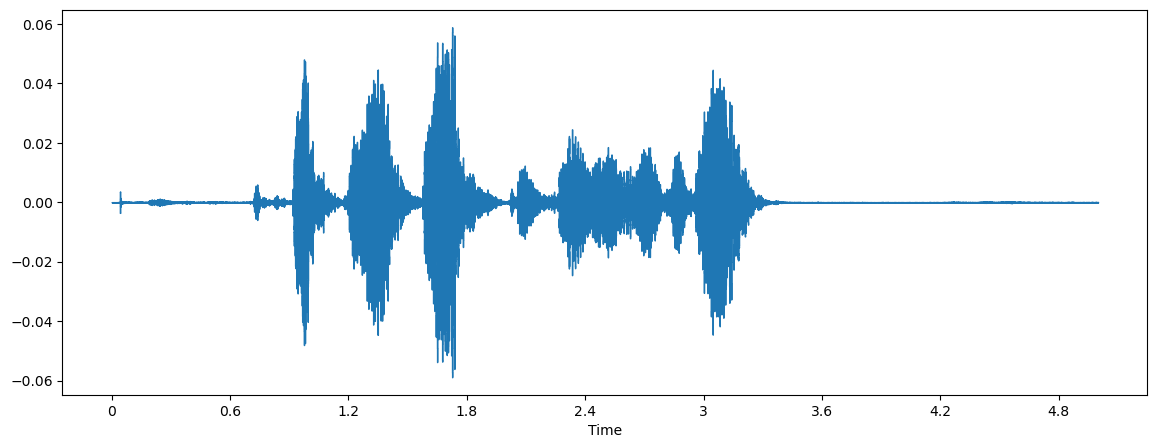

In [25]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.show()

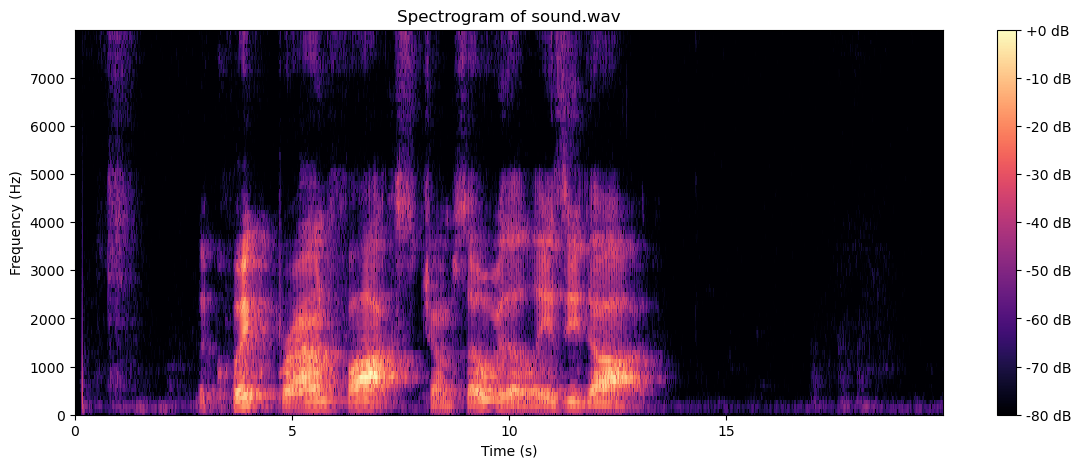

In [31]:
def generate_spectrogram(filename):
    # Load the audio file
    y, sr = librosa.load(filename, sr=44100)

    # Generate the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y, n_fft=512)), ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')

    # Set Y-axis limits and ticks
    ax = plt.gca()
    ax.set_ylim([0, 8000])
    start, end = ax.get_ylim()
    ax.set_yticks(np.arange(start, end, 1000))

    # Add colorbar and labels
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram of ' + filename)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    # Save the spectrogram as an image
    output_filename = filename.replace(".wav", "_spectrogram.png")
    plt.savefig(output_filename)

    # Show the spectrogram
    plt.show()

if __name__ == "__main__":
    

    # Generate and display the spectrogram
    generate_spectrogram("sound.wav")
